In [21]:
%matplotlib inline
import datetime as dt
import pandas
from matplotlib import animation
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import HTML

In [22]:
path = r'C:\Users\pdagade\Downloads\pycon-tatasteel-data.csv'
csv = pandas.read_csv(path)

In [23]:
csv

,Date,TATASTEEL-EQ O,TATASTEEL-EQ H,TATASTEEL-EQ L,TATASTEEL-EQ C,TATASTEEL-EQ V
0,14/8/17 15:29,623.20,624.00,623.00,623.95,42935
1,14/8/17 15:28,623.00,623.40,622.75,623.25,23678
2,14/8/17 15:27,623.20,623.35,623.00,623.00,48967
3,14/8/17 15:26,622.90,623.30,622.80,623.15,25473
4,14/8/17 15:25,622.95,623.10,622.60,622.85,28184
5,14/8/17 15:24,623.10,623.10,622.60,623.00,18603
6,14/8/17 15:23,623.40,623.45,622.75,623.00,15511
7,14/8/17 15:22,622.55,623.85,622.50,623.05,97101
8,14/8/17 15:21,622.55,623.00,622.50,623.00,24923
9,14/8/17 15:20,622.90,623.00,622.40,622.55,44761


In [24]:
class Indicators:

    def sma(self, data, window):
        """
        Calculates Simple Moving Average
        http://fxtrade.oanda.com/learn/forex-indicators/simple-moving-average
        """
        if len(data) < window:
            return None
        return sum(data[-window:]) / float(window)
    
    def ema(self, data, window):
        if len(data) < 2 * window:
            raise ValueError("data is too short")
        c = 2.0 / (window + 1)
        current_ema = self.sma(data[-window*2:-window], window)
        for value in data[-window:]:
            current_ema = (c * value) + ((1 - c) * current_ema)
        return current_ema

In [25]:
i = Indicators()
i.ema(closing_values_tatasteel, 3)         # Testing

623.5375

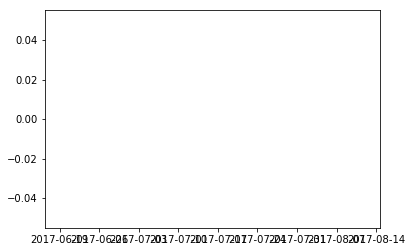

In [26]:
dates = [dt.datetime.strptime(d,'%d/%m/%y %H:%M') for d in csv['Date']][::-1]
closing_values_tatasteel = csv['TATASTEEL-EQ C'].tolist()[::-1]
fig = plt.figure()
ax = plt.axes(xlim=[dates[0], dates[-1]])
line, = ax.plot([], [])

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

def animate(len_data):
    dates_for_plotting = dates[:len_data]
    values = closing_values_tatasteel[:len_data]
    line.set_data(dates_for_plotting, values)
    return line
    #plt.plot(dates_for_plotting, values)
    #plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))  # will show date in this format
    #plt.gca().xaxis.set_major_locator(mdates.MonthLocator())   # Will only show months
    #plt.gca().grid()
    #plt.gca().set_xticks(xrange(0,len(dates), 5)) 
    #plt.gca().set_xticklabels(dates)     # set the ticklabels to the list of datetimes
    #plt.xticks(rotation=30)       # rotate the xticklabels by 30 deg
    #print dates[0]
    #print dates[-1]
    #plt.xlim([dates[0], dates[-1]])
    #plt.show()
    


In [27]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)

In [28]:
HTML(anim.to_html5_video())

RuntimeError: No MovieWriters available!